In [1]:
##IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#READING THE FILE

df = pd.read_csv(r"D:\DATA SCIENCE\DATASETS\MEDICAL COST\insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#For DIsplay of the All columns and Rows

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
#CHECKING THE SHAPE

print("Shape of the dataset :",df.shape)

Shape of the dataset : (1338, 7)


In [5]:
#GETTING THE INFORMATION OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#GETTING THE DESCRIPTION OF THE DATASET

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#CHECKING THE NULL VALUES

print("NUMBER OF NULL VALUES IN EVERY FEATURE")
print("--------------------------------------")
df.isnull().sum()

NUMBER OF NULL VALUES IN EVERY FEATURE
--------------------------------------


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#CHECKING THE TOTAL NUMBER OF NULL VALUES

print("Total number of null values present in the dataset :",df.isnull().sum().sum())

Total number of null values present in the dataset : 0


In [9]:
#CHECKING THE NUMERICAL FEAUTURES

num_var = df.select_dtypes(include=["int64","float64"]).columns

print("All the numerical features in the dataset : ",num_var)

All the numerical features in the dataset :  Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [10]:
#CHECKING THE UPPER AND LOWER LIMIT OF THE FUNCTIONS
num_var = ['age', 'bmi', 'children', 'charges']

upper_limit = []
lower_limit = []

for i,var in enumerate(num_var):
    upper_limit.append(df[var].mean() + 3 * df[var].std())
    lower_limit.append(df[var].mean() - 3 * df[var].std())
    
    print("----------------------------------------------------")
    
    print("Upper limit of the",var,"feature :" ,upper_limit[-1])
    print("Lower limit of the",var,"feature :" ,lower_limit[-1])
    
    print("----------------------------------------------------")

----------------------------------------------------
Upper limit of the age feature : 81.35690654870976
Lower limit of the age feature : -2.942855726587176
----------------------------------------------------
----------------------------------------------------
Upper limit of the bmi feature : 48.95795759602359
Lower limit of the bmi feature : 12.368836125949507
----------------------------------------------------
----------------------------------------------------
Upper limit of the children feature : 4.711396007088641
Lower limit of the children feature : -2.521560431602842
----------------------------------------------------
----------------------------------------------------
Upper limit of the charges feature : 49600.45597522326
Lower limit of the charges feature : -23059.611444940747
----------------------------------------------------


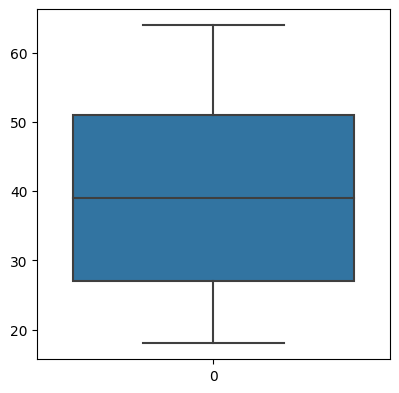

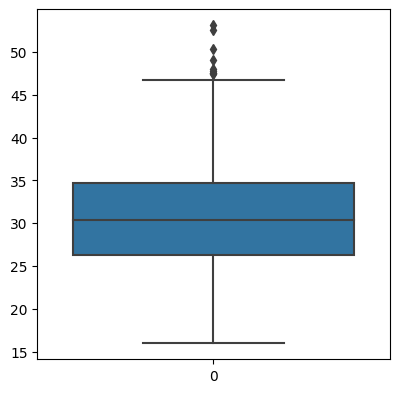

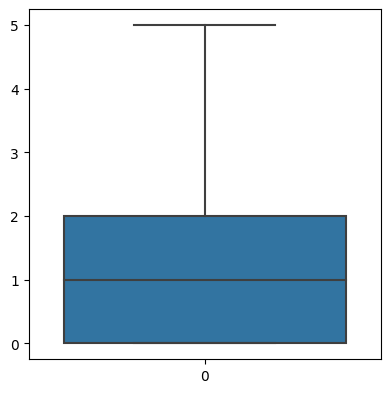

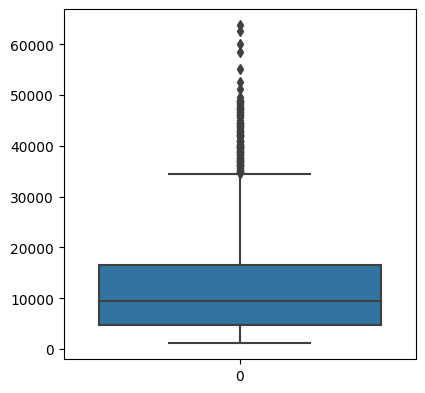

In [11]:
#USING BOXPLOT FOR GETTING THE OUTLIERS
num_var = ['age', 'bmi', 'children', 'charges']



for i,var in enumerate(num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,i+1)
    sns.boxplot(df[var])
    plt.show()

In [12]:
'''def iqr_trimming(df,cols,factor):
    
    drop_outliers = np.array([])
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_lim = q3 + (factor * iqr)
        lower_lim = q1 + (factor * iqr)
        
        s = df[col]
        
        indexes = s[(s < upper_lim) & (s > lower_lim)].index
        
        drop_outliers = np.append(drop_outliers,indexes)
    return drop_outliers        
'''

'def iqr_trimming(df,cols,factor):\n    \n    drop_outliers = np.array([])\n    for col in cols:\n        \n        q1 = df[col].quantile(0.25)\n        q3 = df[col].quantile(0.75)\n        \n        iqr = q3 - q1\n        \n        upper_lim = q3 + (factor * iqr)\n        lower_lim = q1 + (factor * iqr)\n        \n        s = df[col]\n        \n        indexes = s[(s < upper_lim) & (s > lower_lim)].index\n        \n        drop_outliers = np.append(drop_outliers,indexes)\n    return drop_outliers        \n'

In [13]:
'''dropped = np.unique(iqr_trimming(df,num_var,1.5))
df.drop(dropped,inplace=True)'''

'dropped = np.unique(iqr_trimming(df,num_var,1.5))\ndf.drop(dropped,inplace=True)'

In [14]:
#HANDLING THE OUTLIERS USING IQR METHOD
#SORTING THE DATA

df["bmi"] = sorted(df["bmi"])
df["charges"] = sorted(df["charges"])

In [15]:
#CALCULATING THE 25th and 75th PERCENTILE VALUE 

def percentile_25_75(Feature):
    q1,q3 = np.percentile(df[Feature],[25,75])
    print("25th percentile value of the feature ",Feature,":",q1)
    print("75th percentile value of the feature ",Feature,":",q3)

percentile_25_75("bmi")
print("----------------------------------------------------------")
print("----------------------------------------------------------")
percentile_25_75("charges")

25th percentile value of the feature  bmi : 26.29625
75th percentile value of the feature  bmi : 34.69375
----------------------------------------------------------
----------------------------------------------------------
25th percentile value of the feature  charges : 4740.28715
75th percentile value of the feature  charges : 16639.912515


In [16]:
#CACULATING THE INTER QUANTILE RANGE FOR THE DATA

def IQR(Feature,q1,q3):
    iqr = q3 - q1
    print("Inter Quantile Range for the Feature",Feature,":",iqr)
    
IQR("bmi",26.29625,34.69375)
IQR("charges ", 4740.28715,16639.912515)

Inter Quantile Range for the Feature bmi : 8.3975
Inter Quantile Range for the Feature charges  : 11899.625365


In [17]:
#CALCULATING THE UPPER AND LOWER FENCE

def lower_fence(Feature,q1,iqr):
    lower_limit = q1 - (1.5 * iqr)
    print("Lower limit of the",Feature,":",lower_limit)   
    
    
def higher_fence(Feature,q3,iqr):
    upper_limit = q3 + (1.5 * iqr)
    print("Upper limit of the",Feature,":",upper_limit)     

lower_fence("bmi",26.29625,8.3975) 
higher_fence("bmi",34.69375, 8.3975)
 
print("------------------------------------------------")
print("------------------------------------------------")

lower_fence("charges",16639.912515,11899.625365) 
higher_fence("charges",4740.28715, 11899.625365) 

Lower limit of the bmi : 13.7
Upper limit of the bmi : 47.290000000000006
------------------------------------------------
------------------------------------------------
Lower limit of the charges : -1209.5255324999998
Upper limit of the charges : 22589.7251975


In [18]:
#TRIMMING THE OUTLIERS 

df = df.loc[(df["bmi"] < 47.290000000000006) & (df["bmi"] > 13.7)]
df = df.loc[(df["charges"] < 22589.7251975) & (df["charges"] > -1209.5255324999998)]

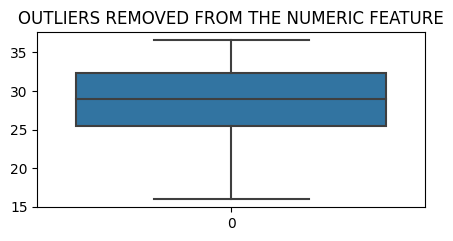

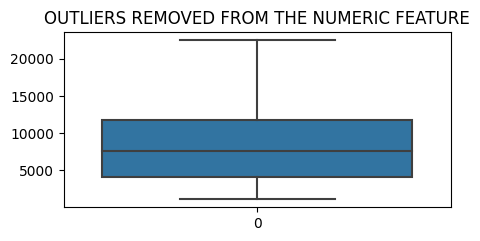

In [19]:
#NOW, CHECKING THE OUTLIERS

out_lier = ["bmi","charges"]

for i,var in enumerate(out_lier):
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,i+1)
    sns.boxplot(df[var])
    plt.title("OUTLIERS REMOVED FROM THE NUMERIC FEATURE")
    plt.show()
    

In [20]:
#CHECKING THE CATEGORICAL FEAUTURES

cat_var = df.select_dtypes(include=["O"]).columns

print("All the categorical features in the dataset : ",cat_var)

All the categorical features in the dataset :  Index(['sex', 'smoker', 'region'], dtype='object')


In [21]:
df["region"].value_counts()

region
southeast    306
northeast    272
southwest    268
northwest    262
Name: count, dtype: int64

In [22]:
#ORDINAL ENCODING THE REGION FEATURE

order_region = {"southeast":3,"northeast":2,"southwest":1,"northwest":0}
df["region"] = df["region"].map(order_region)

In [23]:
#CHECKING THE CONVERSION

df["region"].value_counts()

region
3    306
2    272
1    268
0    262
Name: count, dtype: int64

In [24]:
#CHECKING THE NUMBER OF FEATURES

df["sex"].value_counts()

sex
male      567
female    541
Name: count, dtype: int64

In [25]:
#LABEL ENCODING THE SEX FEATURE

le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])

In [26]:
#CHECKING THE CONVERSION

df["sex"].value_counts()

sex
1    567
0    541
Name: count, dtype: int64

In [27]:
#CHECKING THE NUMBER OF FEATURES

df["smoker"].value_counts()

smoker
no     886
yes    222
Name: count, dtype: int64

In [28]:
#ORDINAL ENCODING THE SMOKER FEATURE

order_smoker = {"no":1,"yes":0}
df["smoker"] = df["smoker"].map(order_smoker)

In [29]:
#CHECKING THE CONVERSION

df["smoker"].value_counts()

smoker
1    886
0    222
Name: count, dtype: int64

In [30]:
#NOW CHECKING THE DATASET

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,15.960,0,0,1,1121.8739
1,18,1,16.815,1,1,3,1131.5066
2,28,1,16.815,3,1,3,1135.9407
3,33,1,17.195,0,1,0,1136.3994
4,32,1,17.290,0,1,0,1137.0110
5,31,0,17.290,0,1,3,1137.4697
6,46,0,17.290,1,1,3,1141.4451
7,37,0,17.385,3,1,0,1146.7966
8,37,1,17.400,2,1,2,1149.3959
9,60,0,17.480,0,1,0,1163.4627


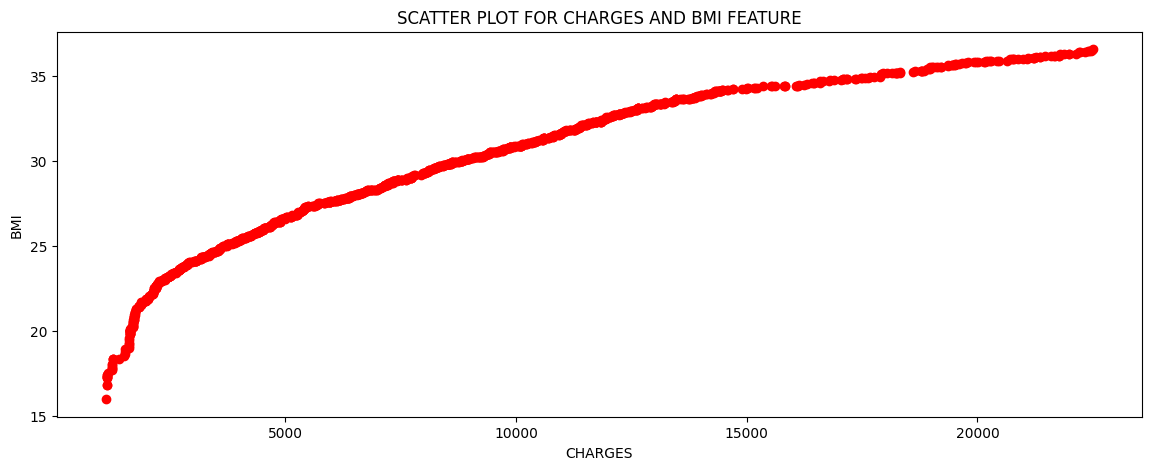

In [31]:
#CHECKING THE RELATION BETWEEN CHARGES AND BMI FEATURE

plt.figure(figsize=(14,5))
plt.scatter(df["charges"],df["bmi"],color="red")
plt.title("SCATTER PLOT FOR CHARGES AND BMI FEATURE")
plt.xlabel("CHARGES")
plt.ylabel("BMI")
plt.show()

In [32]:
#GETTING THE CORRELATION OF THE DATASET

df.corr() 

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.048328,0.026599,0.026934,0.017505,-0.012028,0.017173
sex,-0.048328,1.000000,0.028240,0.003003,-0.078467,-0.016489,0.032247
bmi,0.026599,0.028240,1.000000,0.012888,0.021609,-0.004106,0.949303
children,0.026934,0.003003,0.012888,1.000000,-0.007100,-0.014229,0.010098
smoker,0.017505,-0.078467,0.021609,-0.007100,1.000000,-0.066738,0.006817
region,-0.012028,-0.016489,-0.004106,-0.014229,-0.066738,1.000000,-0.012181
charges,0.017173,0.032247,0.949303,0.010098,0.006817,-0.012181,1.000000


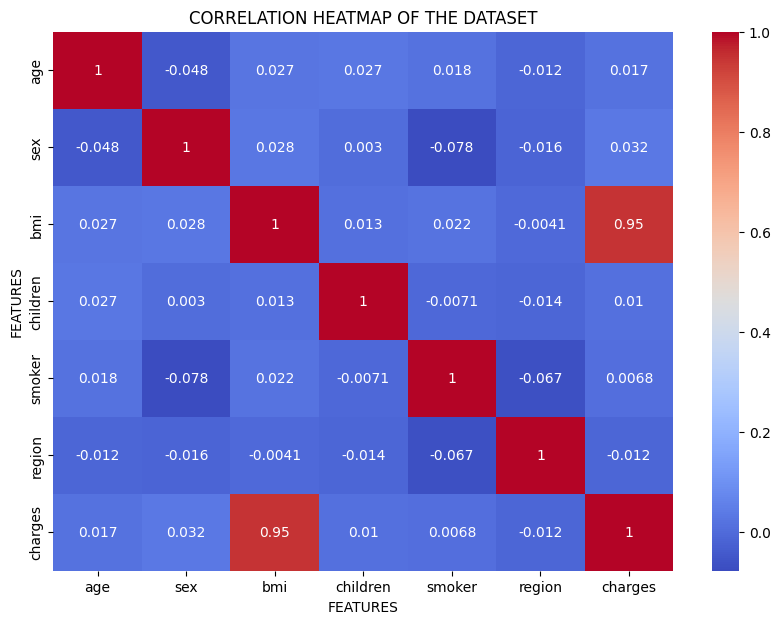

In [33]:
#CREATING HEATMAP FOR THE FEATURE SELECTION

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.title("CORRELATION HEATMAP OF THE DATASET")
plt.xlabel("FEATURES")
plt.ylabel("FEATURES")
plt.show()

In [34]:
#NOW SPLITTING THE DATASET

X = df[["bmi","sex"]]
y = df["charges"]

In [35]:
#SPLITTING THE DATA INTO TRAIN AND TEST


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

print("Shape of the X train dataset :",X_train.shape)
print("Shape of the y train dataset :",y_train.shape)

print("Shape of the X test dataset :",X_test.shape)
print("Shape of the y test dataset :",y_test.shape)

Shape of the X train dataset : (886, 2)
Shape of the y train dataset : (886,)
Shape of the X test dataset : (222, 2)
Shape of the y test dataset : (222,)


In [36]:
#NORMALISING THE DATA

mms = MinMaxScaler()
mms.fit(X_train)

X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)

In [37]:
#STANDARDIZING THE DATA

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [38]:
#TRAINING THE MODEL USING SUPPORT VECTOR MACHINE

svr = SVR(kernel="poly",degree = 9)
svr.fit(X_train_sc,y_train)
svr.score(X_test_sc,y_test)

0.317348314093715

In [39]:
#TRAINING THE MODEL USING DECISION TREE

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9999037201155255

In [43]:
print("Cross Validating the Score")
csv_dt = cross_val_score(dt,X_train,y_train)
print(csv_dt.mean())

Cross Validating the Score
0.9998785443250616


In [41]:
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test,y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print("....................................")
print("Error in Decision Tree Model")
print("Mean Square Error:",mse_dt)
print("Root Mean Square Error:",rmse_dt)


....................................
Error in Decision Tree Model
Mean Square Error: 2545.27311290904
Root Mean Square Error: 50.450699825760985


In [42]:
r2_score(y_pred_dt,y_test)

0.9999035216892738